# Wikipathways Fish 2018

Author: Zachary Flamholz  
Date: 07-2018  
Database: https://www.wikipathways.org/    
Data: http://data.wikipathways.org/20180610/gpml/wikipathways-20180610-gpml-Danio_rerio.zip v. 20180610 (10 June 2018)        
Companion file: http://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Non-mammalian_vertebrates/Danio_rerio.gene_info.gz   

## import libraries

In [53]:
import numpy as np
import pandas as pd
import sys, datetime
import scipy.stats as stat
import matplotlib
from matplotlib import pyplot as py

# Versions of Modules in use

In [2]:
%load_ext version_information
%version_information numpy, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.5
pandas 0.23.1
Mon Jul 09 17:28:42 2018 EDT

## read in data 

In [3]:
df = pd.read_csv('input/wikipathways_Drerio_2018', sep = '~', header=None)

In [4]:
df.head()

,0
0,Exercise-induced Circadian Regulation%WikiPath...
1,Hypertrophy Model%WikiPathways_20180610%WP1327...
2,p38 MAPK Signaling Pathway%WikiPathways_201806...
3,Electron Transport Chain%WikiPathways_20180610...
4,Biogenic Amine Synthesis%WikiPathways_20180610...


In [5]:
df.iloc[0]

0    Exercise-induced Circadian Regulation%WikiPath...
Name: 0, dtype: object

In [6]:
dRerio_geneInfo = pd.read_csv("input/Danio_rerio.gene_info", sep="\t")

## load NCBI reference for converting ENTREZ gene ID to gene symbol

In [7]:
dRerio_geneInfo.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,7955,30037,tnc,-,tenc|wu:fk04d02,ZFIN:ZDB-GENE-980526-104|Ensembl:ENSDARG000000...,5,-,tenascin C,protein-coding,tnc,tenascin C,O,tenascin|etID309720.5,20180409,-
1,7955,30038,sox19a,-,cb799|fc66c01|sox19|wu:fc66c01,ZFIN:ZDB-GENE-980526-102|Ensembl:ENSDARG000000...,5,-,SRY (sex determining region Y)-box 19a,protein-coding,sox19a,SRY (sex determining region Y)-box 19a,O,transcription factor Sox-19a|SRY-box containin...,20180610,-
2,7955,30065,elavl1b,-,fb72d01|fk65g02|hug|wu:fb72d01|wu:fk65g02,ZFIN:ZDB-GENE-000210-17|Ensembl:ENSDARG0000010...,11,-,ELAV like RNA binding protein 1b,protein-coding,elavl1b,ELAV like RNA binding protein 1b,O,ELAV-like protein 1|etID19626.11,20180610,-
3,7955,30066,meis2b,-,meis2|meis2.1,ZFIN:ZDB-GENE-000210-23|Ensembl:ENSDARG0000007...,20,-,Meis homeobox 2b,protein-coding,meis2b,Meis homeobox 2b,O,Meis homeobox 2b|meis homeobox 2b|myeloid ecot...,20180409,-
4,7955,30067,chico,-,-,ZFIN:ZDB-GENE-000210-28|Ensembl:ENSDARG0000001...,2,-,chico,protein-coding,chico,chico,O,chico,20180603,-


In [8]:
dRerio_proteinCoding = dRerio_geneInfo[dRerio_geneInfo["type_of_gene"] == "protein-coding"]

In [9]:
type(dRerio_geneInfo.iloc[0, 1])

numpy.int64

In [22]:
dRerio_geneInfo.loc[dRerio_geneInfo['GeneID'] == 406582]['Symbol'].iloc[0]

'ppp2cb'

In [41]:
565869 in np.asarray(dRerio_geneInfo['GeneID'])

True

## build a dictionary of terms and genes

In [42]:
pathway_dict = {}
for row in df.itertuples():
    splits = row[1].split('\t')
    term_split = splits[0].split('%')
    term = term_split[0] + '_' + term_split[2]
    pathway_dict[term] = []
    for i in range(2, len(splits)):
        if int(splits[i]) in np.asarray(dRerio_geneInfo['GeneID']):
            pathway_dict[term].append(dRerio_geneInfo.loc[dRerio_geneInfo['GeneID'] == int(splits[i])]['Symbol'].iloc[0])

## numbers for the library

In [43]:
## number of terms
len(pathway_dict.keys())

83

In [51]:
dist = []
for i in list(pathway_dict.values()):
    dist.append(len(i))

(array([25., 15., 16., 12.,  4.,  3.,  6.,  1.,  0.,  1.]),
 array([  4. ,  23.8,  43.6,  63.4,  83.2, 103. , 122.8, 142.6, 162.4,
        182.2, 202. ]),
 <a list of 10 Patch objects>)

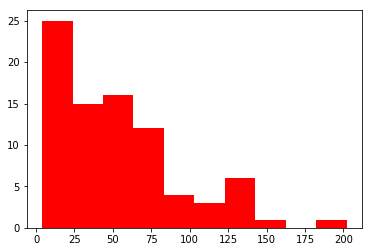

In [54]:
py.hist(dist, color='red')

In [44]:
pathway_dict['Exercise-induced Circadian Regulation_WP562']

['klf9',
 'per1b',
 'tab2',
 'arntl1a',
 'ppp2cb',
 'vapal',
 'sf3a3',
 'ppp1r3cb',
 'gfra1b',
 'cry2',
 'clocka',
 'idi1',
 'btg1',
 'cbx3a',
 'puraa',
 'per2',
 'cry1aa',
 'tob1a',
 'dnaja1',
 'cebpb',
 'herpud1',
 'nckap1',
 'dazap2',
 'hist1h2ba',
 'ncoa4',
 'sumo1',
 'cldn5a',
 'eif4g2b',
 'nr1d2b',
 'gstp1',
 'qki2',
 'hspa8',
 'azin1b',
 'ugp2b',
 'cry1ab',
 'zfr',
 'pigf',
 'tubb4b',
 'g0s2',
 'sumo3b',
 'myf6',
 'cast',
 'si:busm1-160c18.6',
 'gstm.1',
 'psma4']

## build gmt

In [45]:
filename = 'wikipathways_greater4_%s.gmt'% str(datetime.date.today())[0:7].replace('-', '_')
file = open(filename,'w+') 
terms = pathway_dict.keys()
for i,term in enumerate(terms):
    
    progressPercent = ((i+1)/len(terms))*100
    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(terms)))
    sys.stdout.flush()
    
    if len(pathway_dict[term]) > 4:
        file.write("%s\t" % term)
        file.write("\t")
        genes = pathway_dict[term]
    
        for gene in genes:
              file.write("%s\t" % gene)
        file.write("\n")
        
file.close()

## get gmt stats

In [46]:
def getTermStats(loaded_gmt, geneInfoTable, num_samplings, num_genes_in_sampling) :
    # get the relevant terms and set a dictionary for them
    term_set = loaded_gmt.iloc[:,0].apply(lambda x: x.split("\t")[0])
    term_genes_dict = {term_set[i]: loaded_gmt.iloc[i,0].split("\t")[2:] for i in range(0, loaded_gmt.shape[0])}
    term_rank_dict = {k: [] for k in term_set}
    term_stats_dict = {k: [] for k in term_set}
    
    # get the total number of genes in the organism
    n_genes = len(geneInfoTable["Symbol"].unique())
    
    # number of genes per sampling, number of times to sample
    genes_in_sampleing = num_genes_in_sampling
    num_samplings = num_samplings
    
    for i,x in enumerate(range(0,num_samplings)):
        
        progressPercent = ((i+1)/len(range(0,num_samplings)))*100
        
        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(range(0,num_samplings))))
        sys.stdout.flush()
            
        
        randomSet = set(geneInfoTable["Symbol"].sample(genes_in_sampleing).apply(lambda x: x.split('.')[0]))
        
        # initialize an array to hold the pvalue for each term
        pvals = np.array([])
        for key in term_rank_dict.keys():
            
            termSet = set(term_genes_dict[key])
            # calculate p value using fisher exact test
            # implemented using the formula found in the GeneOverap bioconductor package for R
            pval_term = stat.fisher_exact([[n_genes - len(termSet.union(randomSet)), len(randomSet.difference(termSet))], [len(termSet.difference(randomSet)), len(termSet.intersection(randomSet))]])[1]
            pvals = np.append(pvals, [pval_term])
        
        # sort the pvals and add the rank to the term_rank dict
        sorted_pvals = pvals.argsort()
        
        # find the rank for each term by sorting the pvals array and getting the index of the key position in the
        # sorted list. Need to +1 because the index begins with 0
        
        for j,key in enumerate(term_rank_dict.keys()):
            term_rank_dict[key].append(np.where(sorted_pvals == j)[0][0] + 1)
            
    for key in term_rank_dict:
        term_stats_dict[key] = [np.mean(term_rank_dict[key]), np.std(term_rank_dict[key])]
            
    
    
    return term_stats_dict

In [47]:
## load gmt
wikipathway_gmt = pd.read_csv("wikipathways_greater4_2018_07.gmt", sep="~", header=None)

In [48]:
wikipathway_gmt.head()

,0
0,Exercise-induced Circadian Regulation_WP562\t\...
1,Hypertrophy Model_WP1327\t\tankrd1b\tdusp14\tc...
2,p38 MAPK Signaling Pathway_WP1363\t\tgrb2a\ths...
3,Electron Transport Chain_WP1339\t\tATP6\tndufb...
4,Biogenic Amine Synthesis_WP154\t\tddc\ttph1a\t...


In [49]:
iterations_200 = getTermStats(wikipathway_gmt, dRerio_proteinCoding, num_samplings=200, num_genes_in_sampling=300)

In [50]:
df_200_iterations = pd.DataFrame.from_dict(iterations_200, orient='index', columns = ['mean', 'sd'])
df_200_iterations.to_csv('output/wikipathways_greater4_2018_07_stats.tsv', sep='\t', header=False)